<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[4차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 기본적인 Flask 사용법 학습하기<br>
○ 웹 화면에 카메라 영상 출력하기<br>
○ 웹 출력 영상을 Gray 이미지로 출력하기
        
</font></td></tr>   
</table>

# Flask 설치 및 서버 실행하기

- 플라스크(Flask)는 파이썬으로 작성된 마이크로 웹 프레임워크의 하나
  - 특별한 도구나 라이브러리가 필요 없음
  
##  flask 설치하기

In [1]:
# Flask 설치
!pip install flask

## flask 서버 실행하기

- <font color=red>app = Flask(__name__)</font> : Flask 객체를 app 변수에 할당
- <font color=red>@app.route("/")</font> : Flask에게 어떤 URL이 해당 함수를 실행하는지 알려줌
- <font color=red>app.run(host='127.0.0.1', port=5000)</font> 
  - 서버 IP, 포트 등을 설정하고 서버를 실행
  - 브라우저에서 IP와 포트로 서버 접속
   
<img src="./lecture_image/04_flask01.png" width=50%> 

In [5]:
# 실습

### URL를 함수로 연결하기

- <font color=red>@app.route("/hello")</font>
  - URL에  함수명을 설정
  - 브라우저에서 IP와 포트로 서버 접속하고 URL로 함수명을 넘김
  
  <img src="./lecture_image/04_flask02.png" width=50%> 

In [4]:
# 실습

### URL을 변수로 사용하기

- @app.route("/hello/<value>") 
  - URL에  value 값을 설정
  - 브라우저에서 IP와 포트로 서버 접속하고 URL로 100을 넘김
    
  <img src="./lecture_image/04_flask03.png" width=50%>     

In [3]:
# 실습

### html 문서를 반환하기

- <font color=red>render_template("hello.html")</font>
  - hello.html 문서를 반환

- hello.html 파일을 작성하고 templates 폴더를 생성하고 저장
- 브라우저에서 IP와 포트로 서버 접속

  <img src="./lecture_image/04_flask04.png" width=50%>  

In [1]:
# 실습

In [2]:
# 실습

### 이미지가 포함된 문서 반환하기

- static 폴더 : 자원을 담아 놓는 폴더
- static 폴더에 이미지 폴더를 만들고 출력할 이미지를 저장

In [6]:
# 실습

In [7]:
# 실습

# 데이터 스트리밍 구현

## 구현 방법

- <font color=red>Response(stream_with_context(test()))</font>
  - 텍스트 스트리밍 함수 test()를 실행
  
  <img src="./lecture_image/04_flask05.png" width=50%>  

In [6]:
# return yield의 차이 : 리턴은 다시 돌아감 일드는 계속 있음 
# 일드는 중간결과값을 얻을수있다.

def test() :
    yield "hello"
    yield "world"
    yield "^^"
    
for i in test() :
    print(i)


hello
world
^^


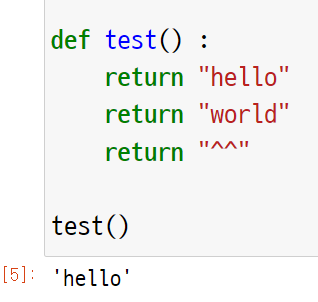


In [9]:
import time

def return_abc():
    temp = []
    
    # ABC 문장을 1초마다 1글자씩 읽어서 리스트에 저장
    for ch in "ABC":
        time.sleep(1)
        temp.append(ch)
    # 반환
    return temp    
# 3초 후에 결과가 한번에 출력(영상을 다 받은다음에 한번에 재생/스트리밍이 아니다.)
for i in return_abc() :
    print(i)

A
B
C


In [12]:
def yield_abc():
    
    # ABC 문장을 1초마다 1글자씩 읽어서 리스트에 저장
    for ch in "ABC":
        time.sleep(1)       
        yield ch    
        
# 1초 마다 결과가 하나씩 출력(스트리밍이다.)
for i in yield_abc() :
    print(i)

A
B
C


In [8]:
# 실습

- yield() 함수 배우기

  
  <img src="./lecture_image/04_yield.png" width=70%>  

## 웹 브라우저에 카메라 영상 출력하기

- <font color=red>ret, buffer = cv2.imencode('.jpg', frame)</font> : frame 이미지를 jpg로 인코딩

- <font color=red>frame = buffer.tobytes()</font> : 전송을 위해 인코딩된 이미지를 byte 형식으로 변환

- 프로토콜 내용 그냥 복사해서 쓰면 됨
- <font color=red>yield (b'--frame\r\n' b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n') </font>

  - b : byte 형식임을 의미
  - --frame : 프레임을 표시
  - Content-Type: image/jpeg : 문서가 jpg 이미지임을 표시

In [4]:
cv2.imencode

<function imencode>

In [5]:
import cv2
cap = cv2.VideoCapture(0)
# 이미지를 읽어서 한프레임씩 바로 전송하는 스트리밍 함수
def get_frames() :
    while True :
        ret, frame = cap.read()
        # 현재 프레임이미지를 읽지 못했다면 다음 프레임이미지를 읽는다
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if not ret :
            continue
            
        else :
            ret1, buffer = cv2.imencode(".jpg", frame)
            
            # 전송하기 위해 바이트로 변환
            frame = buffer.tobytes()

            # 전송 
            yield (b'--frame\r\n' b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')
        
def get_frames2() :
    while True :
        ret, frame = cap.read()
        # 현재 프레임이미지를 읽지 못했다면 다음 프레임이미지를 읽는다

        if not ret :
            continue
            
        else :
            ret1, buffer = cv2.imencode(".jpg", frame)
            # 전송하기 위해 바이트로 변환
            frame = buffer.tobytes()
            # 전송 
            yield (b'--frame\r\n' b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')
            
def get_frames3() :
    while True :
        ret, frame = cap.read()
        # 현재 프레임이미지를 읽지 못했다면 다음 프레임이미지를 읽는다
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, frame = cv2.threshold(frame, 128, 255, cv2.THRESH_BINARY_INV)

        if not ret :
            continue
            
        else :
            ret1, buffer = cv2.imencode(".jpg", frame)
            # 전송하기 위해 바이트로 변환
            frame = buffer.tobytes()
            # 전송 
            yield (b'--frame\r\n' b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')            

- index.html를 작성하고 templates 폴더에 저장
  - video_feed : 실행할 함수명

In [ ]:
# %%writefile 경로 : 원하는 위치에 파일 저장하는 방법 

In [86]:
%%writefile ./templates/index2.html
<html>
<body>
<div class="container">
    <div class="row">
        <div class="col-lg-8  offset-lg-2">
            <h3 class="mt-5">Live Streaming</h3>
            <img src="{{ url_for('video_feed') }}" width="20%">
            <img src="{{ url_for('video_feed2') }}" width="20%">
            <img src="{{ url_for('video_feed3') }}" width="20%">
        </div>
    </div>
</div>
</body>
</html>

Overwriting ./templates/index2.html


- <font color=red>Response(get_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')</font>

  - get_frames() : 호출할 함수명
  - mimetype : 클라이언트에게 전송된 문서의 타입을 알려주기 위한 파라미터 (type/subtype)
  - multipart : 복합문서 타입 (파일, 영상 등)을 의미
  - x-mixed-replace : x (추가적인 확장 형식), mixed (복합문서), repalce (subtype을 다음 메시지로 대체)
  - boundary : 복합문서 내의 각 문서들을 구분하는 분리자 (동영상이므로 frame으로 구분)

In [6]:
from flask import Flask, render_template, Response
app = Flask(__name__)
# 초기화면
@app.route("/")
def index() :
    return render_template("index2.html")

@app.route("/video_feed")
def video_feed() :
    return Response(get_frames(),
                   mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route("/video_feed2")
def video_feed2() :
    return Response(get_frames2(),
                   mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route("/video_feed3")
def video_feed3() :
    return Response(get_frames3(),
                   mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == "__main__" :
    app.run(host="0.0.0.0", port=9004)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:9004
 * Running on http://192.168.70.22:9004
Press CTRL+C to quit


## 웹 출력 영상을 Gray 이미지로 출력하기

In [14]:
# 실습

In [15]:
# 실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 이진 이미지를 출력하는 웹 카메라 만들기<br>
   - threshold() 함수 적용<br>
   - OTSU 이진화 알고리즘 적용<br>
   - 적응형 thresholding 적용</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/04_flask06.png" width=30%><img src="./lecture_image/04_flask07.png" width=30%></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[4차시] 학습요약</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ <font color=red>ret, buffer = cv2.imencode()</font> : 영상 인코딩 함수<br>
○ yield() : 반복 실행 중에 중간 과정을 반환할 때 사용<br><br>

○ Flask : 파이썬으로 제작된 웹 프레임워크 (DJango의 축소 버전)<br>
○ <font color=red>app = Flask(__name__)</font> : Flask 객체를 app 변수에 할당<br>
○ <font color=red>@app.route("/")</font> : Flask에게 어떤 URL이 해당 함수를 실행하는지 알려줌<br>
○ <font color=red>@app.route("/hello")</font> : 서버 주소에 추가적인 URL을 설정<br>
○ <font color=red>@app.route("/hello/<value>")</font> : URL에 value 값을 설정<br>
○ <font color=red>app.run(host='127.0.0.1', port=5000)</font> : 서버 IP, 포트 등을 설정하고 서버를 실행<br><br>

○ <font color=red>render_template("hello.html")</font> : html 문서를 반환하기<br>
○ <font color=red>Response(stream_with_context())</font> : 데이터 스트리밍을 반환하기
        
</font></td></tr>   
</table>